<a href="https://colab.research.google.com/github/everluiz/Machine-learning-class/blob/main/Implementa%C3%A7%C3%A3o_centroide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L05c - Nearest Centroid

## Implementation from sklearn

Criação de vetores de treinamento e teste:

In [ ]:
from sklearn.neighbors import NearestCentroid
import numpy as np

X_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y_train = np.array([0, 0, 0, 1, 1, 1])

X_test = np.array([[-1, -2], [0, -1], [-3, -3], [2, 2],  [1, 2]])
y_test = np.array([0, 0, 0, 1, 1])

chamada da classe que implementa o classificador de NearestCentroid com método de calculo de distância euclidiana

e treinamento do modelo

In [ ]:
cn_model = NearestCentroid(metric='euclidean')
cn_model.fit(X_train, y_train)

cn_model.centroids_

array([[-2.        , -1.33333333],
       [ 2.        ,  1.33333333]])

Plot dos pontos de treinamento com valor médio (centro de massa) dos pontos:

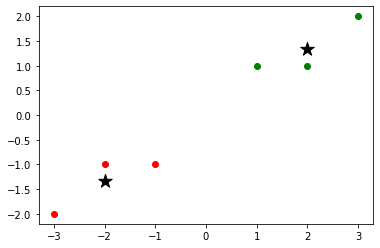

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='r')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='g')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

Predição baseada no treinamento anterior

In [ ]:
y_pred = cn_model.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 1 1]
[0 0 0 1 1]


Precisão do modelo:

In [ ]:
from sklearn.metrics import accuracy_score

print("Precisão: ",accuracy_score(y_test, y_pred)*100,"%")

Precisão:  100.0 %


Plot dos pontos de teste com valor médio (centro de massa) dos pontos obtidos no treinamento:

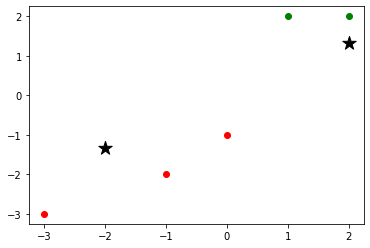

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='r')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

## Implementation from scratch

Classe NearestCentroid construida manualmente

In [ ]:
class NearestCentroidScratch():
  def __init__(self, metric='eucledian'):
    self.metric = metric
    self.centroids_ = np.array([])
    self.labels_ = np.array([])
  
  def _euclidian_dist(self, a, b): #calcula distância euclidiana
    dist = 0.
    for i, j in zip(a,b): # percorre tuplas do vetor a[i] e b[j]
      dist += ((i-j)**2)  # somatória da diferença entre valores i e j elevado ao quadrado
    dist += dist**0.5     # raiz quadrada da somatória
    return dist

  def fit(self, X, y):
      aux = np.unique(y); # lista de todas as classes (labels)
      self.labels_ = aux
      c1 = np.mean(X[y==aux[0]], axis=0)
      self.centroids_ = c1
      for i in aux[1:]:
        c1 = np.mean(X[y==i], axis=0)
        self.centroids_ = np.vstack((self.centroids_, c1))
      print(self.centroids_)

  def predict(self, X):
    predicao = np.zeros(len(X))
    aux = 0;    # contador do vetor de teste
    for i in X: # percorre o vetor de teste
      cont = 0; # contador de labels
      dist = self._euclidian_dist(i,self.centroids_[0])
      pred = self.labels_[cont]
      for j in self.centroids_[1:]: # percorre os centroids
        dist2 = self._euclidian_dist(i,j)
        if dist2 < dist:            # se distancia entre valor [i] de teste e centroid[j] é menor do que centroid anterior:
          dist = dist2              # atualiza a menor distância
          cont +=1                  # incrementa o contador de labels
          pred = self.labels_[cont] # salva a predição com o label do centroid
      predicao[aux] = pred # adiciona ao vetor predicao o label para aquele valor [i] de teste
      aux +=1 # incrementa contador do vetor de teste
    return predicao

Criação de vetores de treinamento:

In [ ]:
import numpy as np

X_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y_train = np.array([1, 1, 1, 2, 2, 2])

chamada da classe com método de calculo de distância euclidiana

e treinamento do modelo

In [ ]:
clf = NearestCentroidScratch()
clf.fit(X_train, y_train)

[[-2.         -1.33333333]
 [ 2.          1.33333333]]


Plot dos pontos de treinamento com valor médio (centro de massa) dos pontos:

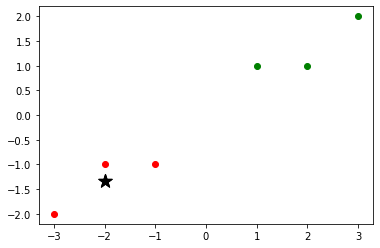

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r')
plt.scatter(X_train[y_train==2, 0], X_train[y_train==2, 1], c='g')

plt.scatter(clf.centroids_[:,0], clf.centroids_[:,1], s=200, marker='*', c='k')

Criação de vetores de teste e Predição baseada no treinamento anterior

In [ ]:
X_test = np.array([[-1, -2], [0, -1], [-3, -3], [2, 2],  [1, 2], [-1, -1], [5,2], [0,0], [1,0.5]])
y_test = np.array([1, 1, 1, 2, 2, 1, 2, 1, 2])

y_pred = clf.predict(X_test)
print(y_test)
print(y_pred)

[1 1 1 2 2 1 2 1 2]
[1. 1. 1. 2. 2. 1. 2. 1. 2.]


Precisão do modelo:

In [ ]:
from sklearn.metrics import accuracy_score

print("Precisão: ",accuracy_score(y_test, y_pred)*100,"%")

Precisão:  100.0 %


Plot dos pontos de teste com valor médio (centro de massa) dos pontos obtidos no treinamento:

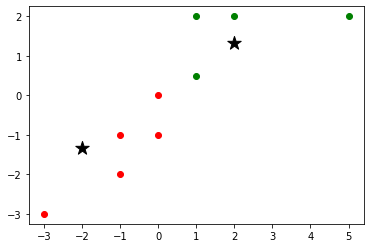

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='r')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], c='g')

plt.scatter(clf.centroids_[:,0], clf.centroids_[:,1], s=200, marker='*', c='k')